<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_4X/blob/main/GQtest_cluster_data(y_hat)_multi_delta_(3_6)_n60_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_4X/multiplication_delta_3.6'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_3.6_n60.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,59.513188,23.197690,91.696478,46.811860,-28.573468,202.645748,228.505453,-25.859706
1,0.0,1.0,98.909504,60.565735,25.230476,63.924326,489.559232,748.189273,-69.103101,817.292373
2,0.0,2.0,45.176289,52.966996,37.403713,71.281602,868.534510,1085.363109,121.579091,963.784018
3,0.0,3.0,98.073087,41.367550,66.671230,48.516207,-29.079293,235.548781,28.744139,206.804641
4,0.0,4.0,57.114543,50.051291,22.253988,97.594194,1151.635210,1388.649226,513.503274,875.145952
...,...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,42.931768,26.163855,65.817183,20.750221,113.167536,278.830563,-1156.670396,1435.500959
59996,999.0,56.0,73.667729,78.956404,46.149260,57.440590,-1140.921521,-874.707537,922.801695,-1797.509233
59997,999.0,57.0,55.298182,97.494140,21.074215,39.046146,5460.203046,5683.115729,403.683873,5279.431856
59998,999.0,58.0,40.599903,89.326199,53.579266,45.375976,4860.991119,5099.872463,474.928001,4624.944463


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         x4            e  \
rep   index                                                            
0.0   0.0    59.513188  23.197690  91.696478  46.811860   -28.573468   
      1.0    98.909504  60.565735  25.230476  63.924326   489.559232   
      2.0    45.176289  52.966996  37.403713  71.281602   868.534510   
      3.0    98.073087  41.367550  66.671230  48.516207   -29.079293   
      4.0    57.114543  50.051291  22.253988  97.594194  1151.635210   
...                ...        ...        ...        ...          ...   
999.0 55.0   42.931768  26.163855  65.817183  20.750221   113.167536   
      56.0   73.667729  78.956404  46.149260  57.440590 -1140.921521   
      57.0   55.298182  97.494140  21.074215  39.046146  5460.203046   
      58.0   40.599903  89.326199  53.579266  45.375976  4860.991119   
      59.0   93.312694  97.806824  34.323029  37.432559 -1657.469927   

                       Y        y_hat        e_hat  
rep   index                                         
0.0   0.0     202.645748   228.505453   -25.859706  
      1.0     748.189273   -69.103101   817.292373  
      2.0    1085.363109   121.579091   963.784018  
      3.0     235.548781    28.744139   206.804641  
      4.0    1388.649226   513.503274   875.145952  
...                  ...          ...          ...  
999.0 55.0    278.830563 -1156.670396  1435.500959  
      56.0   -874.707537   922.801695 -1797.509233  
      57.0   5683.115729   403.683873  5279.431856  
      58.0   5099.872463   474.928001  4624.944463  
      59.0  -1384.594820  1338.580584 -2723.175404  

[60000 rows x 8 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         x4            e  \
rep   index                                                            
0.0   0.0    59.513188  23.197690  91.696478  46.811860   -28.573468   
      1.0    98.909504  60.565735  25.230476  63.924326   489.559232   
      2.0    45.176289  52.966996  37.403713  71.281602   868.534510   
      3.0    98.073087  41.367550  66.671230  48.516207   -29.079293   
      4.0    57.114543  50.051291  22.253988  97.594194  1151.635210   
...                ...        ...        ...        ...          ...   
999.0 55.0   42.931768  26.163855  65.817183  20.750221   113.167536   
      56.0   73.667729  78.956404  46.149260  57.440590 -1140.921521   
      57.0   55.298182  97.494140  21.074215  39.046146  5460.203046   
      58.0   40.599903  89.326199  53.579266  45.375976  4860.991119   
      59.0   93.312694  97.806824  34.323029  37.432559 -1657.469927   

                       Y        y_hat        e_hat  
rep   index                                         
0.0   0.0     202.645748   228.505453   -25.859706  
      1.0     748.189273   -69.103101   817.292373  
      2.0    1085.363109   121.579091   963.784018  
      3.0     235.548781    28.744139   206.804641  
      4.0    1388.649226   513.503274   875.145952  
...                  ...          ...          ...  
999.0 55.0    278.830563 -1156.670396  1435.500959  
      56.0   -874.707537   922.801695 -1797.509233  
      57.0   5683.115729   403.683873  5279.431856  
      58.0   5099.872463   474.928001  4624.944463  
      59.0  -1384.594820  1338.580584 -2723.175404  

[60000 rows x 8 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,59.513188,23.197690,91.696478,46.811860,-28.573468,202.645748,228.505453,-25.859706
1,0.0,1.0,98.909504,60.565735,25.230476,63.924326,489.559232,748.189273,-69.103101,817.292373
2,0.0,2.0,45.176289,52.966996,37.403713,71.281602,868.534510,1085.363109,121.579091,963.784018
3,0.0,3.0,98.073087,41.367550,66.671230,48.516207,-29.079293,235.548781,28.744139,206.804641
4,0.0,4.0,57.114543,50.051291,22.253988,97.594194,1151.635210,1388.649226,513.503274,875.145952
...,...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,42.931768,26.163855,65.817183,20.750221,113.167536,278.830563,-1156.670396,1435.500959
59996,999.0,56.0,73.667729,78.956404,46.149260,57.440590,-1140.921521,-874.707537,922.801695,-1797.509233
59997,999.0,57.0,55.298182,97.494140,21.074215,39.046146,5460.203046,5683.115729,403.683873,5279.431856
59998,999.0,58.0,40.599903,89.326199,53.579266,45.375976,4860.991119,5099.872463,474.928001,4624.944463


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3         x4            e  \
rep   index                                                            
0.0   0.0    59.513188  23.197690  91.696478  46.811860   -28.573468   
      1.0    98.909504  60.565735  25.230476  63.924326   489.559232   
      2.0    45.176289  52.966996  37.403713  71.281602   868.534510   
      3.0    98.073087  41.367550  66.671230  48.516207   -29.079293   
      4.0    57.114543  50.051291  22.253988  97.594194  1151.635210   
...                ...        ...        ...        ...          ...   
999.0 55.0   42.931768  26.163855  65.817183  20.750221   113.167536   
      56.0   73.667729  78.956404  46.149260  57.440590 -1140.921521   
      57.0   55.298182  97.494140  21.074215  39.046146  5460.203046   
      58.0   40.599903  89.326199  53.579266  45.375976  4860.991119   
      59.0   93.312694  97.806824  34.323029  37.432559 -1657.469927   

                       Y        y_hat        e_hat  
rep   index                                         
0.0   0.0     202.645748   228.505453   -25.859706  
      1.0     748.189273   -69.103101   817.292373  
      2.0    1085.363109   121.579091   963.784018  
      3.0     235.548781    28.744139   206.804641  
      4.0    1388.649226   513.503274   875.145952  
...                  ...          ...          ...  
999.0 55.0    278.830563 -1156.670396  1435.500959  
      56.0   -874.707537   922.801695 -1797.509233  
      57.0   5683.115729   403.683873  5279.431856  
      58.0   5099.872463   474.928001  4624.944463  
      59.0  -1384.594820  1338.580584 -2723.175404  

[60000 rows x 8 columns]

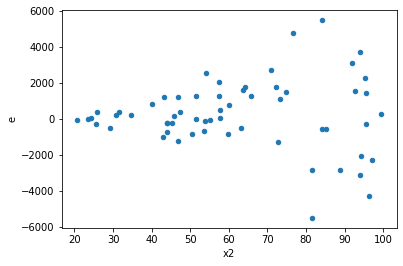

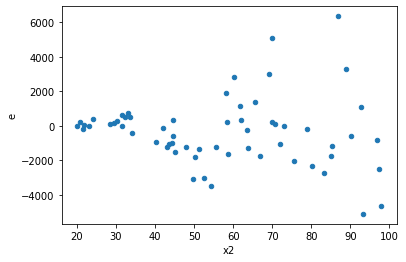

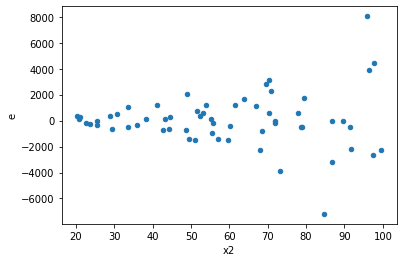

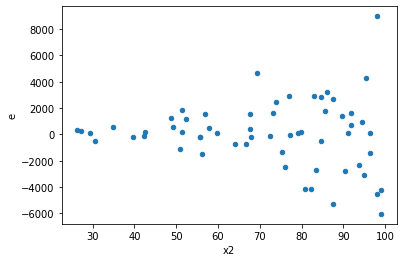

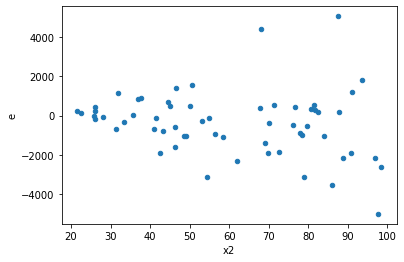

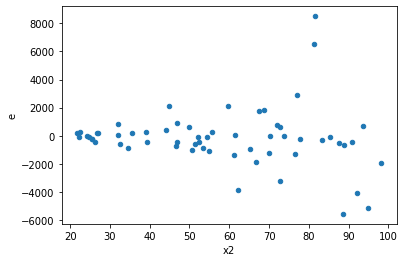

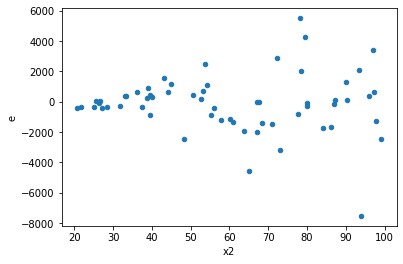

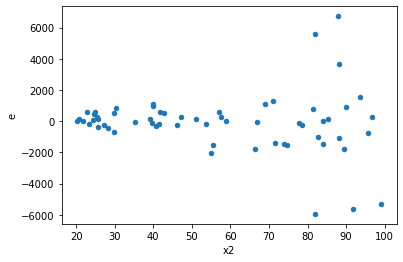

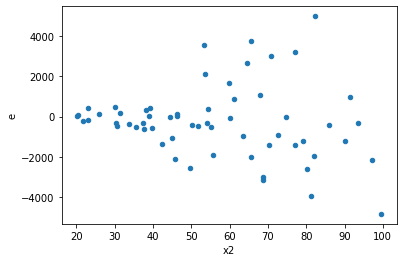

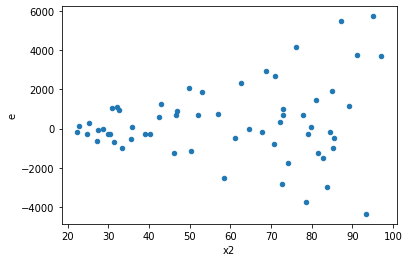

In [11]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,33.0,19.0,106858277.0792357,97120949.02100353,3238129.608461688,5111628.895842291,1.578574521070709,0.2951668729659347,0.8524165635170327,0.14758343648296735,Reject005=1 : Homoscedasticity
3.0,21.0,31.0,21870875.95781102,128229427.7120125,1041470.2837052867,4136433.152000403,3.9717246057986646,0.0005352212157492264,0.9997323893921254,0.0002676106078746132,Reject005=0 : Heteroscedasticity
4.0,29.0,23.0,79392817.03623378,121227164.64072078,2737683.346077027,5270746.288726991,1.925257826577981,0.11094337609589044,0.9445283119520548,0.05547168804794522,Reject005=1 : Homoscedasticity
5.0,28.0,24.0,85349426.2085045,91246783.8439085,3048193.793160875,3801949.326829521,1.2472794004632581,0.5864153838078703,0.7067923080960649,0.29320769190393514,Reject005=1 : Homoscedasticity
6.0,23.0,29.0,118860906.21862465,182780085.59945822,5167865.487766289,6302761.5723951105,1.219606351464724,0.6067639163537224,0.6966180418231388,0.3033819581768612,Reject005=1 : Homoscedasticity
7.0,25.0,27.0,27302459.668583155,179443255.68596813,1092098.3867433262,6646046.506887709,6.085574878199794,1.3985936581750735e-05,0.9999930070317091,6.992968290875368e-06,Reject005=0 : Heteroscedasticity
10.0,30.0,22.0,89349689.35076697,97978669.21536697,2978322.9783588992,4453575.8734257715,1.4953300584880687,0.33205607429580875,0.8339719628520956,0.16602803714790437,Reject005=1 : Homoscedasticity
11.0,18.0,34.0,64384679.8680822,133649866.42427714,3576926.6593379,3930878.4242434455,1.098954157749229,0.7870104837388956,0.6064947581305522,0.3935052418694478,Reject005=1 : Homoscedasticity
12.0,24.0,28.0,67619121.26692362,80661852.70405705,2817463.3861218174,2880780.4537163232,1.022473075570881,0.9472908197632082,0.5263545901183959,0.4736454098816041,Reject005=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,33.0,19.0,106858277.0792357,97120949.02100353,3238129.608461688,5111628.895842291,1.578574521070709,0.2951668729659347,Reject005=1 : Homoscedasticity
1.0,14.0,38.0,148103581.01902336,90588985.3612382,10578827.215644525,2383920.667401005,0.22534829417343522,0.00434391570265367,Reject005=0 : Heteroscedasticity
2.0,29.0,23.0,282026841.4829835,34711462.37723154,9725063.499413226,1509194.0164013712,0.1551860321007087,5.475778898926208e-06,Reject005=0 : Heteroscedasticity
3.0,21.0,31.0,21870875.95781102,128229427.7120125,1041470.2837052867,4136433.152000403,3.9717246057986646,0.0005352212157492264,Reject005=0 : Heteroscedasticity
4.0,29.0,23.0,79392817.03623378,121227164.64072078,2737683.346077027,5270746.288726991,1.925257826577981,0.11094337609589044,Reject005=1 : Homoscedasticity
5.0,28.0,24.0,85349426.2085045,91246783.8439085,3048193.793160875,3801949.326829521,1.2472794004632581,0.5864153838078703,Reject005=1 : Homoscedasticity
6.0,23.0,29.0,118860906.21862465,182780085.59945822,5167865.487766289,6302761.5723951105,1.219606351464724,0.6067639163537224,Reject005=1 : Homoscedasticity
7.0,25.0,27.0,27302459.668583155,179443255.68596813,1092098.3867433262,6646046.506887709,6.085574878199794,1.3985936581750735e-05,Reject005=0 : Heteroscedasticity
8.0,38.0,14.0,224676676.74050188,24748011.518502504,5912544.12475005,1767715.1084644645,0.2989770682750201,0.0030772169419890087,Reject005=0 : Heteroscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject005=1 : Homoscedasticity      501
Reject005=0 : Heteroscedasticity    499
Name: Result_test, dtype: int64